In [1]:
#1002040669

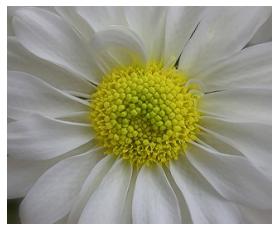

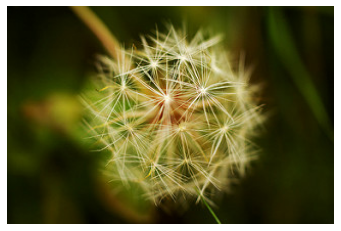

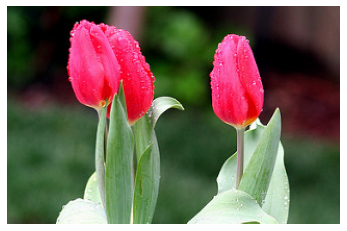

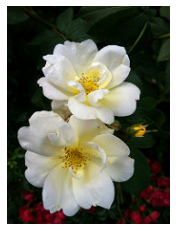

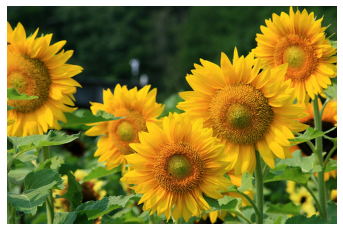

In [32]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
image_loc = 'D:/Work/MSCS/Courses/CSE 5334/Homework/Assignment-2-Image-Classifier/flowers' # location for images
classes = ['daisy','dandelion','tulip','rose','sunflower'] # categories of images
# read and store all images
for cls in classes:
    path = os.path.join(image_loc,cls)
    for img in os.listdir(path):
        image_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB))
        plt.show()
        break


In [33]:
print(image_arr.shape)

(330, 500, 3)


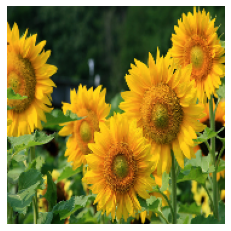

In [34]:
image_size = 180 # new dimension of images 
resized_image_arr = cv2.resize(image_arr,(image_size,image_size)) # resize all images to a fixed image_size
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image_arr, cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
data = [] # list to contain all images with its correct label

# method to create a list of all resized images associated with their label's index
def create_train_data():
    for cls in classes:
        path = os.path.join(image_loc,cls)
        cls_num = classes.index(cls)
        for img in os.listdir(path):
            try:
                image_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED) # read unchanged image
                resized_image_arr = cv2.resize(image_arr,(image_size,image_size))
                data.append([resized_image_arr,cls_num])
            except Exception as e:
                pass
create_train_data()

In [36]:
# total number of images
print(len(data))

4317


In [37]:
for sample in data[:5]:
    print(sample[1])

0
0
0
0
0


In [38]:
# shuffle the images
import random
random.shuffle(data)

In [39]:
for sample in data[:5]:
    print(sample[1])

3
0
3
4
0


In [40]:
x_train = [] # to keep image array 
y_train = [] # to keep label array

In [41]:
# popuate x and y with image and label array
for feature, label in data:
    x_train.append(feature)
    y_train.append(label)
    
# convert x and y to numpy array
x_train = np.array(x_train).reshape(-1,image_size,image_size,3)
y_train = np.array(y_train)

In [42]:
x_train = x_train/255.0 # values for RGB images are between 0-255 but we need it between 0-1 so divide by 255

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# train model
model = Sequential()
# first layer of CNN with 16 filters. input_shape is required in first layer, 3 denotes that images are RGB
# relu activation is used which sets learning rate to 0.001 by default
# MaxPooling2D will take the maximum pixels
model.add(layers.Conv2D(16, 3, strides = 2,activation = 'relu',input_shape=(image_size, image_size, 3)))
model.add(layers.MaxPooling2D())
# second layer of CNN with 32 filters
# relu activation is used which sets learning rate to 0.001 by default
# MaxPooling2D will take the maximum pixels
model.add(layers.Conv2D(32,3, strides = 2,activation = 'relu'))
model.add(layers.MaxPooling2D())
# third layer of CNN with 64 filters
# relu activation is used which sets learning rate to 0.001 by default
# MaxPooling2D will take the maximum pixels
model.add(layers.Conv2D(64,3, strides = 2,activation = 'relu'))
model.add(layers.MaxPooling2D())
# forth layer of CNN with 128 filters
# relu activation is used which sets learning rate to 0.001 by default
# MaxPooling2D will take the maximum pixels
# model.add(layers.Conv2D(512,3,strides = 2,activation = 'relu'))
# model.add(layers.MaxPooling2D())
# dropout regularization
model.add(layers.Dropout(0.1))
# Flatten will convert 2D map to 1D vector
model.add(layers.Flatten())
#
model.add(layers.Dense(64,activation='relu'))
# second dense layer will have number of classes
model.add(layers.Dense(5))

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
epoch = 15
result = model.fit(x_train,y_train,batch_size = 16, epochs = epoch, validation_split = 0.1)

Epoch 1/15
243/243 [==============================] - 11s 42ms/step - loss: 1.2955 - accuracy: 0.4239 - val_loss: 1.1239 - val_accuracy: 0.4375
Epoch 2/15
243/243 [==============================] - 8s 31ms/step - loss: 1.0683 - accuracy: 0.5616 - val_loss: 1.0354 - val_accuracy: 0.5625
Epoch 3/15
243/243 [==============================] - 7s 30ms/step - loss: 0.9581 - accuracy: 0.6319 - val_loss: 0.9572 - val_accuracy: 0.6157
Epoch 4/15
243/243 [==============================] - 7s 30ms/step - loss: 0.8932 - accuracy: 0.6520 - val_loss: 0.9015 - val_accuracy: 0.6481
Epoch 5/15
243/243 [==============================] - 7s 29ms/step - loss: 0.8224 - accuracy: 0.6885 - val_loss: 0.8689 - val_accuracy: 0.6644
Epoch 6/15
243/243 [==============================] - 7s 29ms/step - loss: 0.7857 - accuracy: 0.6924 - val_loss: 0.8297 - val_accuracy: 0.7060
Epoch 7/15
243/243 [==============================] - 7s 29ms/step - loss: 0.7316 - accuracy: 0.7197 - val_loss: 0.7788 - val_accuracy: 0.708

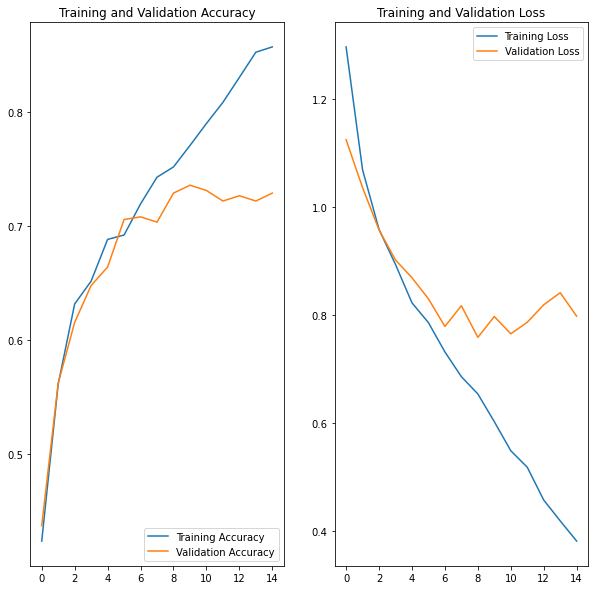

In [54]:
accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()